#  Cross Validation

Cross-validation, it’s a model validation techniques for assessing how the results of a statistical analysis (model) will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.
The goal of cross-validation is to define a data set to test the model in the training phase (i.e. validation data set) in order to limit problems like overfitting,underfitting and get an insight on how the model will generalize to an independent data set. It is important the validation and the training set to be drawn from the same distribution otherwise it would make things worse.

Underfitting refers to not capturing enough patterns in the data. The model performs poorly both in the training and the test set.

Overfitting refers: a)capturing noise and b) capturing patterns which do not generalize well to unseen data. The model performs extremely well to the training set but poorly on the test set.

In [67]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [51]:
# Data preprocessing

col_headers = ['x1', 'x2', 'Class']

data = pd.read_csv('4.linearsep.csv', header=None, names=col_headers)
print(data.head())

X = np.array(data.iloc[:, 0:2])
y = np.array(data['Class'])

         x1        x2  Class
0 -0.177497  0.930496    1.0
1  1.977424  1.766155    0.0
2  1.800024  1.700343    0.0
3 -0.770837  2.359163    1.0
4 -0.308009  1.594063    1.0


### Simple Cross Validation

In [71]:
# Split data into Train and Test dataset with a ratio 70:30
X_base, X_test, y_base, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

# Split train dataset into Train and Cross Validation dataset with a ratio 70:30
X_train, X_cv, y_train, y_cv = train_test_split(X_base, y_base, test_size=0.3, random_state=14)

# Find accuracy on cross validation dataset for a KNN model trained for different values of K
for i in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_cv)
    acc_score = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\n CV accuracy for K = %d is %d%%'%(i, acc_score))
    
# K = 1 has the high accuracy score on cross validation. This will now be used on test dataset

knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
acc_score = accuracy_score(y_test, pred, normalize=True) * float(100)

print('\n Accuracy for K = 19 on test dataset: ',acc_score)


 CV accuracy for K = 1 is 95%

 CV accuracy for K = 3 is 95%

 CV accuracy for K = 5 is 95%

 CV accuracy for K = 7 is 95%

 CV accuracy for K = 9 is 95%

 CV accuracy for K = 11 is 95%

 CV accuracy for K = 13 is 95%

 CV accuracy for K = 15 is 95%

 CV accuracy for K = 17 is 95%

 CV accuracy for K = 19 is 95%

 CV accuracy for K = 21 is 95%

 CV accuracy for K = 23 is 95%

 CV accuracy for K = 25 is 95%

 CV accuracy for K = 27 is 95%

 CV accuracy for K = 29 is 95%

 CV accuracy for K = 31 is 95%

 CV accuracy for K = 33 is 95%

 CV accuracy for K = 35 is 90%

 CV accuracy for K = 37 is 90%

 CV accuracy for K = 39 is 85%

 CV accuracy for K = 41 is 85%

 CV accuracy for K = 43 is 85%

 CV accuracy for K = 45 is 47%

 CV accuracy for K = 47 is 47%

 CV accuracy for K = 49 is 47%

 Accuracy for K = 19 on test dataset:  83.33333333333334


### K Fold Cross Validation 

Optimal value for K:  19


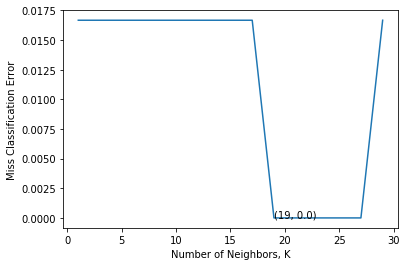

In [70]:
# Define list of neighbors
neighbors = list(filter(lambda x: x%2!=0, range(0,30)))

cv_scores = []

# Perform 10 fold cross validation
for value in neighbors:
    knn = KNeighborsClassifier(n_neighbors = value)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# Convert score to Miss Classification Error

MSE = [1 - x for x in cv_scores]

# Determine best value for K
optimal_k = neighbors[MSE.index(min(MSE))]
print('Optimal value for K: ',optimal_k)

plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors, K')
plt.ylabel('Miss Classification Error')
plt.annotate('(%s, %s)'% (neighbors[MSE.index(min(MSE))], MSE[MSE.index(min(MSE))]), xy=(neighbors[MSE.index(min(MSE))], MSE[MSE.index(min(MSE))]))
plt.show()

In [73]:
# Evaluating optimal value of K in test dataset

knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

acc_score = accuracy_score(y_test,pred)

print("Accuracy score on test dataset: ", acc_score)

Accuracy score on test dataset:  0.8333333333333334
